In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Database
df=pd.read_csv("/content/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# EDA & Data visualizationm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#Feature Engineering - Renaming The columns
df=df.rename({"YearsExperience":"exp", "Salary":"sal"}, axis=1)
df

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='exp', ylabel='Density'>

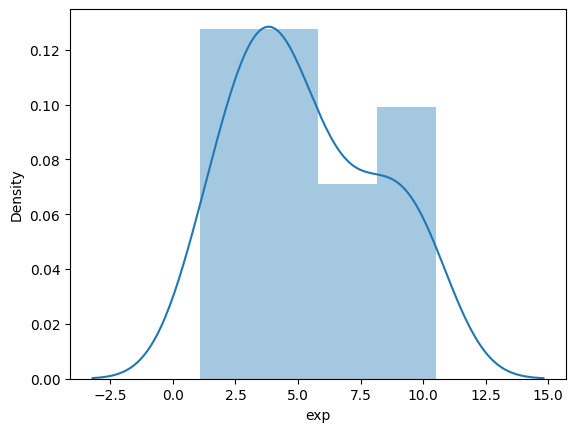

In [5]:
sns.distplot(df["exp"])

<Axes: xlabel='sal', ylabel='Density'>

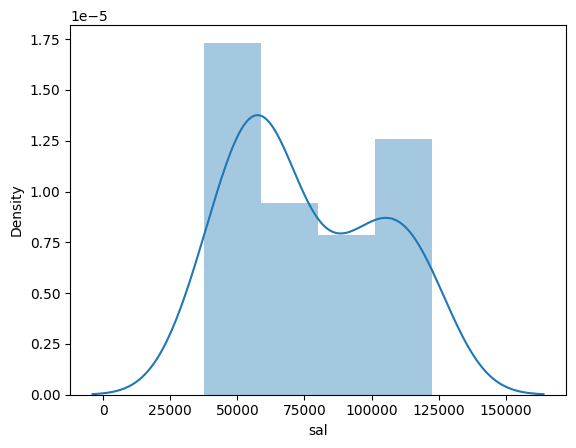

In [6]:
sns.distplot(df["sal"])

In [7]:
#correlation Analysis for the dataset
df.corr()

,exp,sal
exp,1.000000,0.978242
sal,0.978242,1.000000


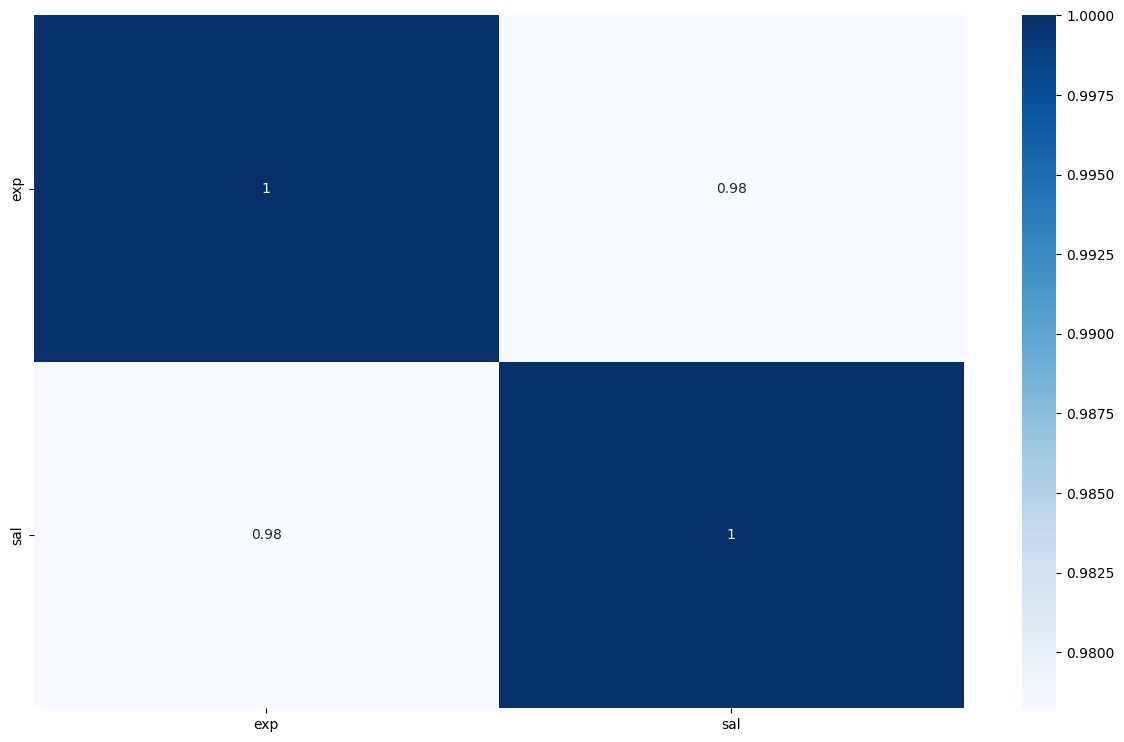

In [8]:
corr_matrx = df.corr()              #Correation analysis using heat map

plt.figure(figsize=(15,9))
sns.heatmap(corr_matrx,annot=True,cmap='Blues')
plt.show()

<Axes: xlabel='sal', ylabel='exp'>

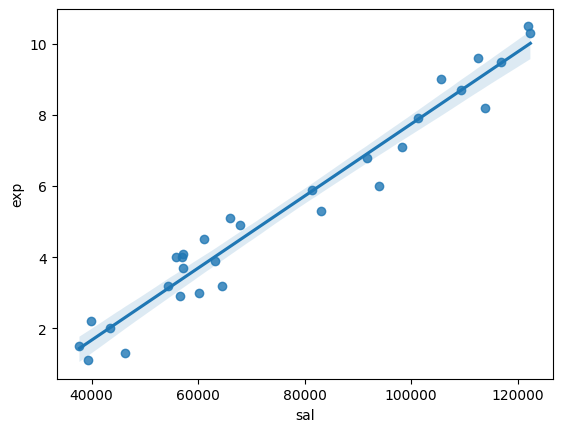

In [9]:
sns.regplot(x=df["sal"], y=df["exp"])

In [14]:
#Building the model
model=smf.ols("exp~sal",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    exp   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        05:29:58   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
sal            0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Testing The Model and finding the coefficent parameter
model.params

Intercept   -2.383161
sal          0.000101
dtype: float64

In [12]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept    -7.281283
 sal          24.950094
 dtype: float64,
 Intercept    6.300123e-08
 sal          1.143068e-20
 dtype: float64)

In [13]:
#To finding the Rsquared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [15]:
model.fittedvalues

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [16]:
df['Predicted_Salary'] = model.fittedvalues
df

,exp,sal,Predicted_Salary
0,1.1,39343.0,1.600934
1,1.3,46205.0,2.295819
2,1.5,37731.0,1.437694
3,2.0,43525.0,2.024427
4,2.2,39891.0,1.656428
5,2.9,56642.0,3.352729
6,3.0,60150.0,3.707969
7,3.2,54445.0,3.130248
8,3.2,64445.0,4.142905
9,3.7,57189.0,3.408121


# LOG Transformation

In [17]:
df['log_exp'] = np.log(df['exp'])
df

,exp,sal,Predicted_Salary,log_exp
0,1.1,39343.0,1.600934,0.095310
1,1.3,46205.0,2.295819,0.262364
2,1.5,37731.0,1.437694,0.405465
3,2.0,43525.0,2.024427,0.693147
4,2.2,39891.0,1.656428,0.788457
5,2.9,56642.0,3.352729,1.064711
6,3.0,60150.0,3.707969,1.098612
7,3.2,54445.0,3.130248,1.163151
8,3.2,64445.0,4.142905,1.163151
9,3.7,57189.0,3.408121,1.308333


In [18]:
model_log = smf.ols('log_exp~sal',data=df).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_exp   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.25e-13
Time:                        05:36:05   Log-Likelihood:                0.92814
No. Observations:                  30   AIC:                             2.144
Df Residuals:                      28   BIC:                             4.946
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
sal         2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SQR Root Transformation

In [19]:
df['sqrt_exp'] = np.sqrt(df['exp'])
df

,exp,sal,Predicted_Salary,log_exp,sqrt_exp
0,1.1,39343.0,1.600934,0.095310,1.048809
1,1.3,46205.0,2.295819,0.262364,1.140175
2,1.5,37731.0,1.437694,0.405465,1.224745
3,2.0,43525.0,2.024427,0.693147,1.414214
4,2.2,39891.0,1.656428,0.788457,1.483240
5,2.9,56642.0,3.352729,1.064711,1.702939
6,3.0,60150.0,3.707969,1.098612,1.732051
7,3.2,54445.0,3.130248,1.163151,1.788854
8,3.2,64445.0,4.142905,1.163151,1.788854
9,3.7,57189.0,3.408121,1.308333,1.923538


In [20]:
model_sqrt = smf.ols('exp~sal',data=df).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    exp   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        05:42:17   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
sal            0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cube Root Transformation

In [21]:
df["cbrt_exp"] = df["exp"].apply(lambda x: x**(1/3))
df

,exp,sal,Predicted_Salary,log_exp,sqrt_exp,cbrt_exp
0,1.1,39343.0,1.600934,0.095310,1.048809,1.032280
1,1.3,46205.0,2.295819,0.262364,1.140175,1.091393
2,1.5,37731.0,1.437694,0.405465,1.224745,1.144714
3,2.0,43525.0,2.024427,0.693147,1.414214,1.259921
4,2.2,39891.0,1.656428,0.788457,1.483240,1.300591
5,2.9,56642.0,3.352729,1.064711,1.702939,1.426043
6,3.0,60150.0,3.707969,1.098612,1.732051,1.442250
7,3.2,54445.0,3.130248,1.163151,1.788854,1.473613
8,3.2,64445.0,4.142905,1.163151,1.788854,1.473613
9,3.7,57189.0,3.408121,1.308333,1.923538,1.546680


In [23]:
model_cbrt = smf.ols('cbrt_exp~sal',data=df).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cbrt_exp   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.91e-16
Time:                        05:45:57   Log-Likelihood:                 27.410
No. Observations:                  30   AIC:                            -50.82
Df Residuals:                      28   BIC:                            -48.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8078      0.055     14.723      0.000       0.695       0.920
sal         1.154e-05    6.8e-07     16.962      0.000    1.01e-05    1.29e-05
==============================================================================
Omnibus:                        3.111   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.907
Skew:                          -0.590   Prob(JB):                        0.385
Kurtosis:                       3.361   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Reciprocal transformation

In [26]:
df["rcpl_exp"] = df["exp"].apply(lambda x: 1/x)
df

,exp,sal,Predicted_Salary,log_exp,sqrt_exp,cbrt_exp,rcpl-exp,rcpl_exp
0,1.1,39343.0,1.600934,0.095310,1.048809,1.032280,0.909091,0.909091
1,1.3,46205.0,2.295819,0.262364,1.140175,1.091393,0.769231,0.769231
2,1.5,37731.0,1.437694,0.405465,1.224745,1.144714,0.666667,0.666667
3,2.0,43525.0,2.024427,0.693147,1.414214,1.259921,0.500000,0.500000
4,2.2,39891.0,1.656428,0.788457,1.483240,1.300591,0.454545,0.454545
5,2.9,56642.0,3.352729,1.064711,1.702939,1.426043,0.344828,0.344828
6,3.0,60150.0,3.707969,1.098612,1.732051,1.442250,0.333333,0.333333
7,3.2,54445.0,3.130248,1.163151,1.788854,1.473613,0.312500,0.312500
8,3.2,64445.0,4.142905,1.163151,1.788854,1.473613,0.312500,0.312500
9,3.7,57189.0,3.408121,1.308333,1.923538,1.546680,0.270270,0.270270


In [27]:
model_rcpl = smf.ols('rcpl_exp~sal',data=df).fit()
model_rcpl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rcpl_exp   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           7.58e-07
Time:                        05:54:12   Log-Likelihood:                 19.103
No. Observations:                  30   AIC:                            -34.21
Df Residuals:                      28   BIC:                            -31.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7045      0.072      9.735      0.000       0.556       0.853
sal         -5.68e-06   8.97e-07     -6.329      0.000   -7.52e-06   -3.84e-06
==============================================================================
Omnibus:                       19.260   Durbin-Watson:                   0.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.826
Skew:                           1.652   Prob(JB):                     4.06e-06
Kurtosis:                       5.991   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""